In [30]:
#IMPORTAR LIBRERÍAS
#Advertencias
import warnings
warnings.filterwarnings('ignore')

#Tratamiento de datos 
import io
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Preparación de datos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn import set_config

#Modelado
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Evaluación4
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
#CARGAR DATOS
datos = pd.read_csv(r'C:\Users\maria\OneDrive\Universidad\Análisis de Decisiones\Lending_club_cleaned_2.csv')
datos.head(5)

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


In [32]:
datos.tail(5)

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
38700,Fully Paid,110000.0,Not Verified,4 years,MORTGAGE,8.07%,2500,home_improvement,36 months,A
38701,Fully Paid,18000.0,Not Verified,3 years,RENT,10.28%,8500,credit_card,36 months,C
38702,Fully Paid,100000.0,Not Verified,< 1 year,MORTGAGE,8.07%,5000,debt_consolidation,36 months,A
38703,Fully Paid,200000.0,Not Verified,< 1 year,MORTGAGE,7.43%,5000,other,36 months,A
38704,Fully Paid,22000.0,Not Verified,< 1 year,OWN,13.75%,7500,debt_consolidation,36 months,E


In [33]:
#EXPLORAR DATOS
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38705 entries, 0 to 38704
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_status          38705 non-null  object 
 1   annual_inc           38705 non-null  float64
 2   verification_status  38705 non-null  object 
 3   emp_length           38705 non-null  object 
 4   home_ownership       38705 non-null  object 
 5   int_rate             38705 non-null  object 
 6   loan_amnt            38705 non-null  int64  
 7   purpose              38705 non-null  object 
 8   term                 38705 non-null  object 
 9   grade                38705 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.0+ MB


,annual_inc,loan_amnt
count,3.870500e+04,38705.000000
mean,6.961750e+04,11303.916161
std,6.422378e+04,7470.319733
min,4.000000e+03,500.000000
25%,4.149600e+04,5500.000000
50%,6.000000e+04,10000.000000
75%,8.320000e+04,15000.000000
max,6.000000e+06,35000.000000


In [34]:
datos.describe(include = 'object')

,loan_status,verification_status,emp_length,home_ownership,int_rate,purpose,term,grade
count,38705,38705,38705,38705,38705,38705,38705,38705
unique,2,3,11,4,371,14,2,7
top,Fully Paid,Not Verified,10+ years,RENT,10.99%,debt_consolidation,36 months,B
freq,33265,16499,8899,18507,934,18275,28284,11697


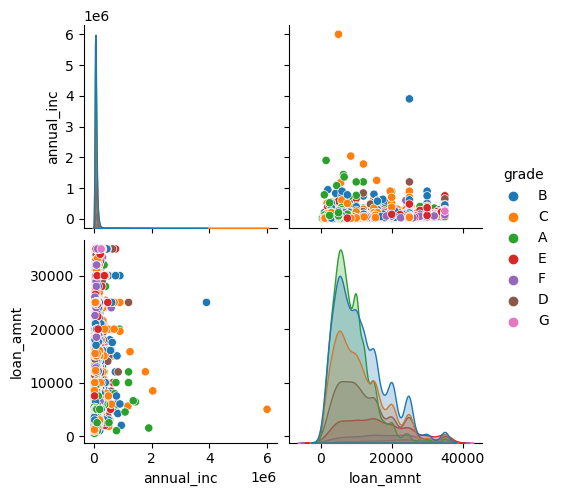

In [35]:
sb.pairplot(data = datos, vars = ['annual_inc', 'loan_amnt'], hue = 'grade', kind = 'scatter')
plt.show()

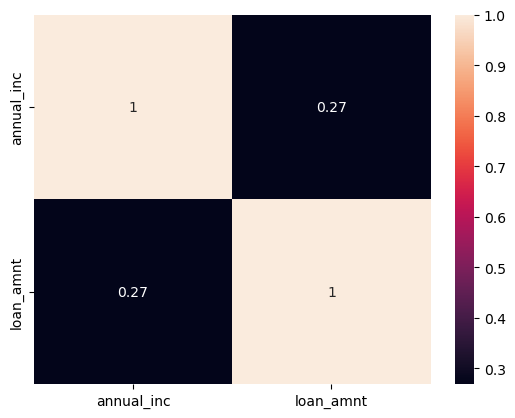

In [36]:
sb.heatmap(datos.corr(), annot = True)
plt.show()

In [37]:
#PREPARACIÓN DE DATOS
datos['loan_status'] = np.where(datos['loan_status'] == 'Fully Paid', 0, 1)
datos.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,0,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,1,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,0,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,0,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,0,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


In [38]:
## TRY TO GET INT RATE TO NUM
#datos["int_rate"] = datos["int_rate"].astype(float)
def quitar_ultimo_char(string):
    return(string[:-1])

datos["int_rate_str"] = datos["int_rate"]

quitar_ultimo_char_v = np.vectorize(quitar_ultimo_char)

datos.drop("int_rate", inplace = True, axis = 1)
datos.head()

datos["int_rate"] = quitar_ultimo_char_v(datos["int_rate_str"]).astype(float)

In [39]:
datos.drop('int_rate_str', inplace = True, axis = 1)
datos.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,loan_amnt,purpose,term,grade,int_rate
0,0,24000.0,Verified,10+ years,RENT,5000,credit_card,36 months,B,10.65
1,1,30000.0,Source Verified,< 1 year,RENT,2500,car,60 months,C,15.27
2,0,12252.0,Not Verified,10+ years,RENT,2400,small_business,36 months,C,15.96
3,0,49200.0,Source Verified,10+ years,RENT,10000,other,36 months,C,13.49
4,0,80000.0,Source Verified,1 year,RENT,3000,other,60 months,B,12.69


In [40]:
datos.head()
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38705 entries, 0 to 38704
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_status          38705 non-null  int32  
 1   annual_inc           38705 non-null  float64
 2   verification_status  38705 non-null  object 
 3   emp_length           38705 non-null  object 
 4   home_ownership       38705 non-null  object 
 5   loan_amnt            38705 non-null  int64  
 6   purpose              38705 non-null  object 
 7   term                 38705 non-null  object 
 8   grade                38705 non-null  object 
 9   int_rate             38705 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 2.8+ MB


In [41]:
x = datos.drop('loan_status', axis = 1)
y = datos['loan_status']

In [42]:
numCols = x.select_dtypes(include = ['float64', 'int64']).columns.to_list()
matCols = x[['verification_status', 'home_ownership', 'term', 'emp_length', 'grade']].columns.to_list()
ordCols = x[['purpose']].columns.to_list()

In [43]:
numCols

['annual_inc', 'loan_amnt', 'int_rate']

In [44]:
matCols

['verification_status', 'home_ownership', 'term', 'emp_length', 'grade']

In [45]:
ordCols

['purpose']

In [46]:
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
matTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
ordTransformer = Pipeline(steps = [('ordinal', OrdinalEncoder(handle_unknown = 'error'))])

In [47]:
preprocesador = ColumnTransformer(transformers = [
    ('numeric', numTransformer, numCols),
    ('catOhe', matTransformer, matCols),
    ('catOrd', ordTransformer, ordCols)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['annual_inc', 'loan_amnt', 'int_rate']),
                                ('catOhe',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['verification_status', 'home_ownership',
                                  'term', 'emp_length', 'grade']),
                                ('catOrd',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['purpose'])])

In [48]:
xpre = preprocesador.fit_transform(x)
xpre

<38705x31 sparse matrix of type '<class 'numpy.float64'>'
	with 346316 stored elements in Compressed Sparse Row format>

In [49]:
codCat = preprocesador.named_transformers_['catOhe']['onehot'].get_feature_names(matCols)
codCat

array(['verification_status_Not Verified',
       'verification_status_Source Verified',
       'verification_status_Verified', 'home_ownership_MORTGAGE',
       'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'term_ 36 months', 'term_ 60 months',
       'emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G'],
      dtype=object)

In [50]:
labels = np.concatenate([numCols, codCat, ordCols])
labels

array(['annual_inc', 'loan_amnt', 'int_rate',
       'verification_status_Not Verified',
       'verification_status_Source Verified',
       'verification_status_Verified', 'home_ownership_MORTGAGE',
       'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'term_ 36 months', 'term_ 60 months',
       'emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'purpose'],
      dtype=object)

In [51]:
xpro = pd.DataFrame(xpre, columns = labels)
xpro.head()

ValueError: Shape of passed values is (38705, 1), indices imply (38705, 31)